In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scifit.solvers import linear, scientific, specials
from scifit.interfaces import solvers

In [2]:
class Taylor(solvers.FitSolver1D):
    @staticmethod
    def model(x, a, b, c):
        return a * np.power(x[:, 0], 2)  + b * np.power(x[:, 0], 1) + c * np.power(x[:, 0], 0) 

class Exp(solvers.FitSolver1D):
    @staticmethod
    def model(x, a, b, c):
        return a * np.exp(b * x[:, 0]) + c

In [3]:
models = [Exp(), Taylor()]

In [4]:
labels = {
    "Exp": r"$y = a e^{b x_1} + c$",
    "Taylor": r"$y = ax^2_1 + bx_1 + c$",
}

In [5]:
data = models[0].synthetic_dataset(sigma=0.015, xmin=2., xmax=2.5, resolution=30, parameters=[2.0, 1.0, 3.0], scale_mode="auto")

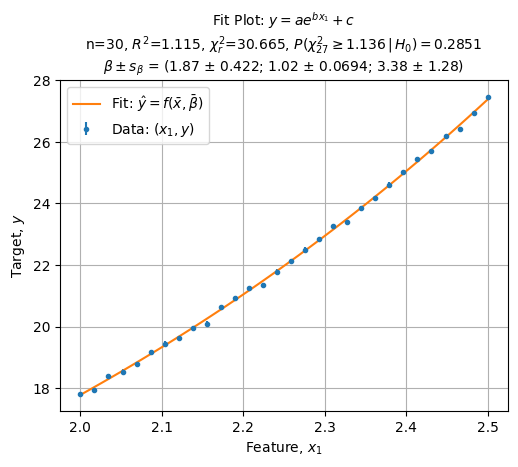

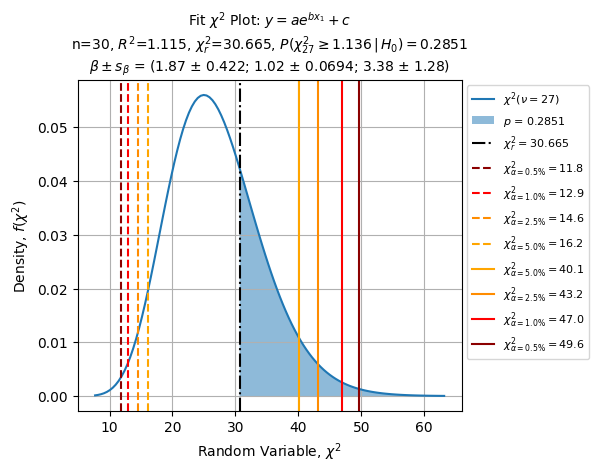

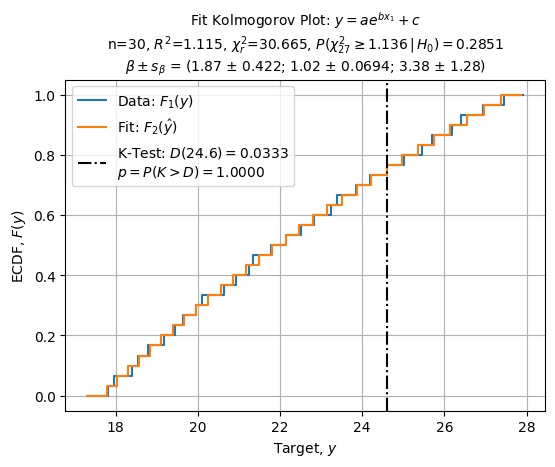

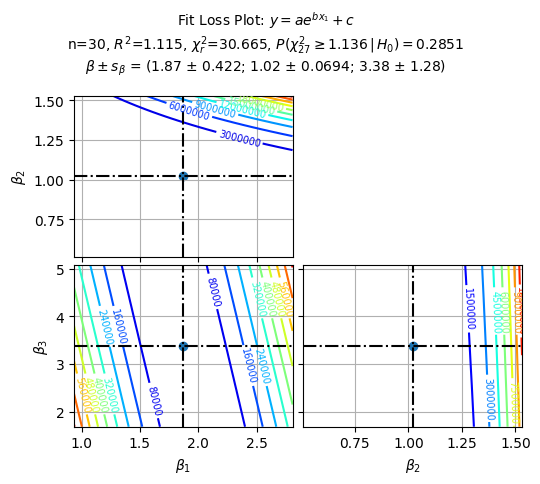

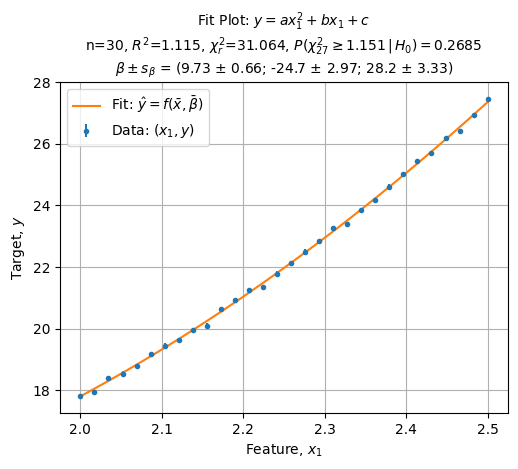

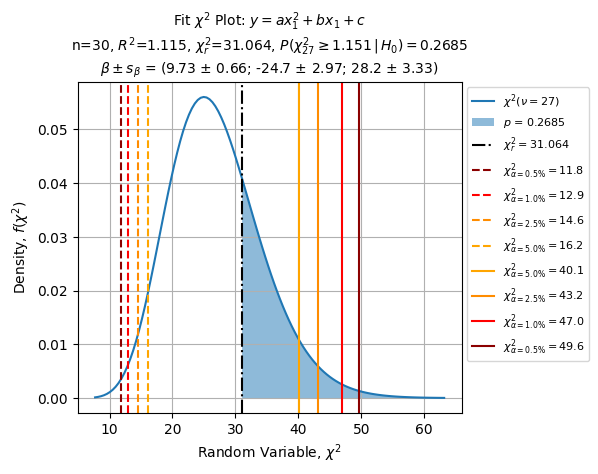

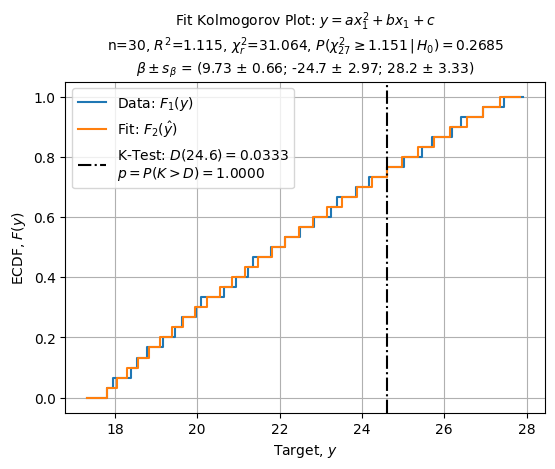

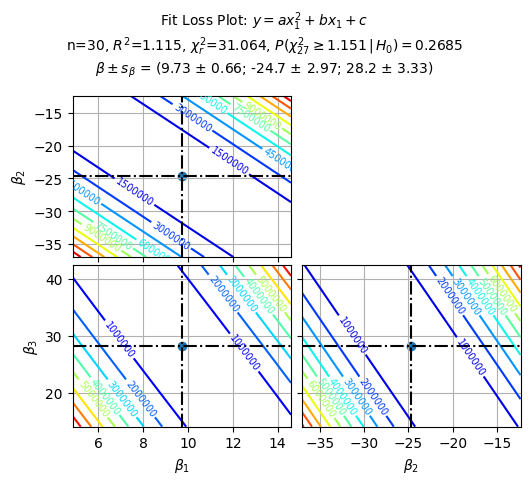

In [6]:
for i, model in enumerate(models):
    
    name = model.__class__.__name__
    title = labels[name]
    file = "Taylor_y{}".format(i)
    
    sol = model.fit(data)
    
    axe = model.plot_fit(title=title)
    axe.figure.savefig("figures/IntroPolynomial/{}_fit.pdf".format(file))
    
    axe = model.plot_chi_square(title=title)
    axe.figure.savefig("figures/IntroPolynomial/{}_chi2.pdf".format(file))
    
    axe = model.plot_kolmogorov(title=title)
    axe.figure.savefig("figures/IntroPolynomial/{}_k2s.pdf".format(file))
    
    axe = model.plot_loss(title=title)
    axe[0][0].figure.savefig("figures/IntroPolynomial/{}_loss.pdf".format(file))

In [7]:
data

,x0,y,sy,yref,ynoise
id,,,,,
1,2.000000,17.812009,0.071902,17.778112,0.033897
2,2.017241,17.949483,0.071902,18.035116,-0.085633
3,2.034483,18.399604,0.071902,18.296590,0.103014
4,2.051724,18.540131,0.071902,18.562611,-0.022480
5,2.068966,18.781447,0.071902,18.833259,-0.051811
6,2.086207,19.172401,0.071902,19.108613,0.063788
7,2.103448,19.450561,0.071902,19.388755,0.061806
8,2.120690,19.628003,0.071902,19.673770,-0.045767
9,2.137931,19.964870,0.071902,19.963742,0.001129


Text(0, 0.5, 'Target, $y$')

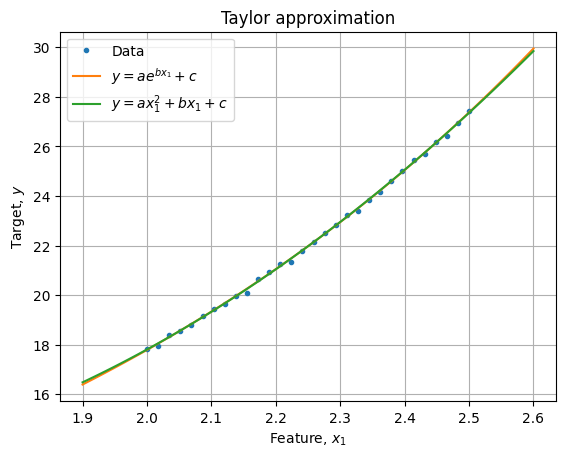

In [8]:
fig, axe = plt.subplots()
xlin = np.linspace(1.9, 2.6, 120).reshape(-1, 1)
axe.plot(data["x0"], data["y"], linestyle="none", marker=".", label="Data")
for model, label in zip(models, labels.values()):
    axe.plot(xlin, model.predict(xlin), label=label)
axe.legend()
axe.grid()
axe.set_title("Taylor approximation")
axe.set_xlabel("Feature, $x_1$")
axe.set_ylabel("Target, $y$")

Text(0, 0.5, 'Target, $y$')

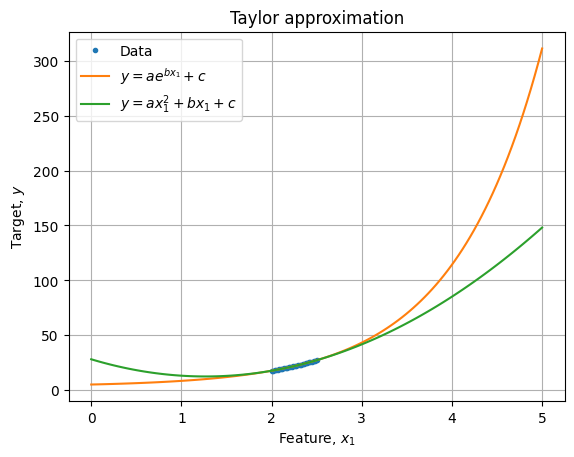

In [9]:
fig, axe = plt.subplots()
xlin = np.linspace(0, 5, 120).reshape(-1, 1)
axe.plot(data["x0"], data["y"], linestyle="none", marker=".", label="Data")
for model, label in zip(models, labels.values()):
    axe.plot(xlin, model.predict(xlin), label=label)
axe.legend()
axe.grid()
axe.set_title("Taylor approximation")
axe.set_xlabel("Feature, $x_1$")
axe.set_ylabel("Target, $y$")